In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import ast
from itertools import groupby
import statistics
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from scipy import stats
import statsmodels.api as sm

In [43]:
df1 = pd.read_csv('depth_score.csv')

In [44]:
df2  = pd.read_csv('almost.csv')

In [45]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [46]:
df = pd.merge(df1.drop(['ltiFeatures','stiFeatures','main_cat'],axis=1),df2, on='userID')

In [47]:
df.drop(['depthOfMaxCat','deepestVal'],axis=1,inplace=True)

In [50]:
### START HERE

In [51]:
X = df.iloc[:,2:]
y = df['inAudience']

logit = sm.Logit(y, X)

# fit the model
result = logit.fit()
clf = LogisticRegression().fit(X, y)

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [19]:
print (result.summary())

                           Logit Regression Results                           
Dep. Variable:             inAudience   No. Observations:                96406
Model:                          Logit   Df Residuals:                    96395
Method:                           MLE   Df Model:                           10
Date:                Sat, 02 Nov 2019   Pseudo R-squ.:                0.002214
Time:                        18:29:11   Log-Likelihood:                -7570.5
converged:                       True   LL-Null:                       -7587.3
                                        LLR p-value:                 0.0002157
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
main_cat_val                    1.3260      0.369      3.591      0.000       0.602       2.050
maxDepth                        0.1439      0.342      0.420      0.674      -0.

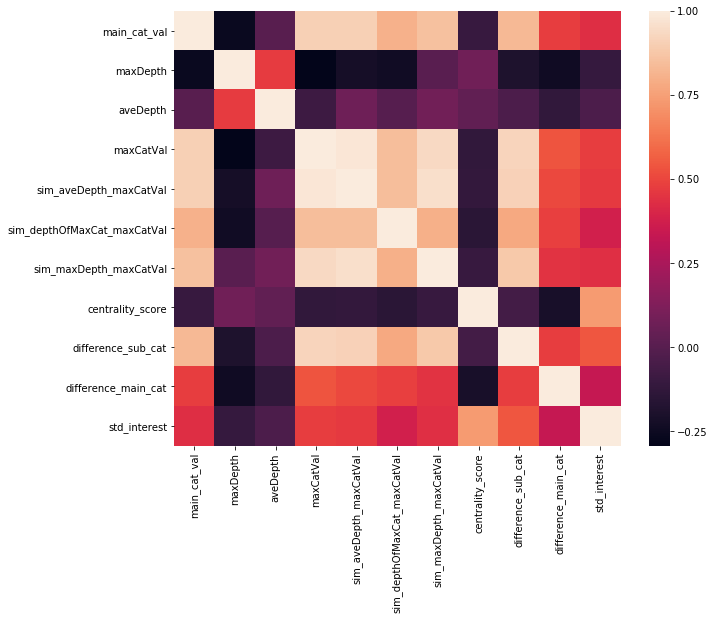

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr())